<p>Department Of Computer Science

COMP432, COMPUTER SECURITY

Dr. Mohammad Alkhanafse

Section 2

</p>

<div align="center">

<img src="https://github.com/sondosaabed/Introducing-Generative-AI-with-AWS/assets/65151701/01485d19-c6d6-4072-99d7-178ea8ec4364" alt="Birzeit University Logo" height="170px">


# Iris eye Recognition

</div>
<div align="center">
An (End-to-end Identification) Biometric Authentication system using Iris

</div>

<b>Prepared by:</b> Sondos Aabed

<b>Studnet ID:</b> 1190652

<hr>

## Abstract

<hr>

## Table of Contents
- Introduction
    - About Dataset Used
    - Aim and Objectives
    - Methodology
- Theory
- Software Listing
- Implementation
    - Dataset Analysis
    - Data Modeling
    - GUI
- Conclusion
- Refrences

## List of Figures

## List of Tables

<hr>

## Introduction

The Iris-Recongtion has been widely used in identication, for many resons : [1]
1. `Unique:` there are not any iris having the same physical characteristic as others, even if they come from the same person or identical twins; 
2. `Stability:` the iris is formed during childhood, and it generally maintains unchangeable physical characteristics throughout life; 
3. `Informative:` the iris has rich texture information such as spots, stripes, laments and coronas.
4. `Safety:` Since the iris is located in a circular area under the surface of the eye between the black pupil and the white sclera, it is rarely disturbed by external factors. As a result, it is dicult to forge the iris pattern; 
5. `Contactless:` Iris Recognition (IR) is more hygienic than biometrics that requires contact, such as fngerprint recognition.
 

### About Dataset used

CASIA-V4-Distance contains 2,567 images from 142 subjects. These images were obtained using near-infrared imaging techniques. Subjects were located three meters away from the camera. The resolution of the iris images is 2,352  1,728 pixels. Each sample in the dataset contains the upper part of the face, which includes irises and other facial details. These details, such as skin lines, can be used for multi-modal biometric information fusion. This is a publicly available long-range and high-quality iris and facial dataset.

### Aim and Objectives

- To design a biometric based authentication system.
- To perform data analysis on Iris Dataset
- To perfrom data modeling as a user recognition task (Verifier Module) 
- To build an enrollment module (Enrollment Module)

### Methodogly 

The approach in this implenetauion, is an end-to-end identifiation of Iris using Deep learning. Where a base model is used as the Feature extractor and the Dense softmax are used for the classification task.

<hr>

## Theory

<hr>

## Software Listing

<hr>

## Implemetation

In this section, the aim and objectives are met and presented. First the dataset is looked into and decisions are made based on that, then the model archeiticure is prepared and finally the enrollment module is used and the model is integrated into it.

<hr>

Necceary imports

In [22]:
import pandas as pd
import numpy as np
import os
import PIL
import math
import tensorflow as tf
import cv2
from keras import backend as K
from tensorflow import keras as keras
import matplotlib.pyplot as plt
from keras import Sequential
import random
from keras.layers import InputLayer,Activation,Dense,Dropout, Conv2D, BatchNormalization, Flatten, MaxPooling2D, Input, Reshape, Concatenate

### Dataset Analysis

#### Loading Dataset

In [28]:
def load_dataset(path):
    """
    Args:
        path(str): string that has the path of the dataset
    Returns:
        df(pd.DataFrame): the loaded dataframe
    """
    labels = []
    images = []

    for folder in os.listdir(path):
        for image in os.listdir(path+'/'+folder):
            if image.endswith('b') is False:
                images.append(path+'/'+folder+'/'+image)
                labels.append(folder)

    df = pd.DataFrame(list(zip(labels, images)), columns=['Label', 'ImagePath'])
    return df, labels, images

In [29]:
df, labels, images = load_dataset('/kaggle/input/casia-iris-distance/CASIA-Iris-Distance')

#### Expolring Dataset

In [7]:
def missing_values(df):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': missing_count.values / len(df) * 100  
    })
    return  missing_percetanges

In [8]:
def explore_data(df):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    head = pd.DataFrame(df.head())
    tail = pd.DataFrame(df.tail())
    nunique = pd.DataFrame(df.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(df.describe())
    dtypes =  pd.DataFrame(df.dtypes, columns=["Datatype"])
    results = {
        'Table 3: Dataset Head:':head,
        'Table 4: Dataset Tail:':tail,
        'Table 5: Dataset Numerical Describtion: ':describe,
        'Table 6: Missing Values By Percentage': missing_values(df), 
        'Table 7: Dataset Columns Data types: ':dtypes,
        'Table 8: Number of uniques in the datasets:':nunique}
    return results

In [9]:
def print_sample_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Table 6: Missing Values By Percentage':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [10]:
print_sample_exploration(explore_data(df))

Table 3: Dataset Head:


,Label,ImagePath
0,135,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
1,135,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
2,135,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
3,135,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
4,135,/kaggle/input/casia-iris-distance/CASIA-Iris-D...


Table 4: Dataset Tail:


,Label,ImagePath
2562,085,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
2563,085,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
2564,085,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
2565,085,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
2566,085,/kaggle/input/casia-iris-distance/CASIA-Iris-D...


Table 5: Dataset Numerical Describtion: 


,Label,ImagePath
count,2567,2567
unique,142,2567
top,074,/kaggle/input/casia-iris-distance/CASIA-Iris-D...
freq,23,1


Table 6: Missing Values By Percentage
Total Sum of Missing Percetange:  0.0


,Column,Counts,Percentage
0,Label,0,0.0
1,ImagePath,0,0.0


Table 7: Dataset Columns Data types: 


,Datatype
Label,object
ImagePath,object


Table 8: Number of uniques in the datasets:


,#_of_Unique
Label,142
ImagePath,2567


In [11]:
def show_random_samples(df, num):
    """
    Shows a sample on the dataframe in a specific location.
    Args:
        df (pd.DataFrame): the dataset
        num (int): the number of random samples to display
    Return:
        Nothing but shows a sample in the display
    """
    random_indices = random.sample(range(df.shape[0]), num)
    num_rows = math.ceil(num / 4)  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))  # Adjust figsize as needed

    for i, idx in enumerate(random_indices):
        row = i // 4
        col = i % 4
        
        image_path = df.loc[idx, "ImagePath"]
        image = PIL.Image.open(image_path)
        image = image.resize((image.width // 10, image.height // 10))
        
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Image {idx} Person Label: {df.loc[idx, 'Label']}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

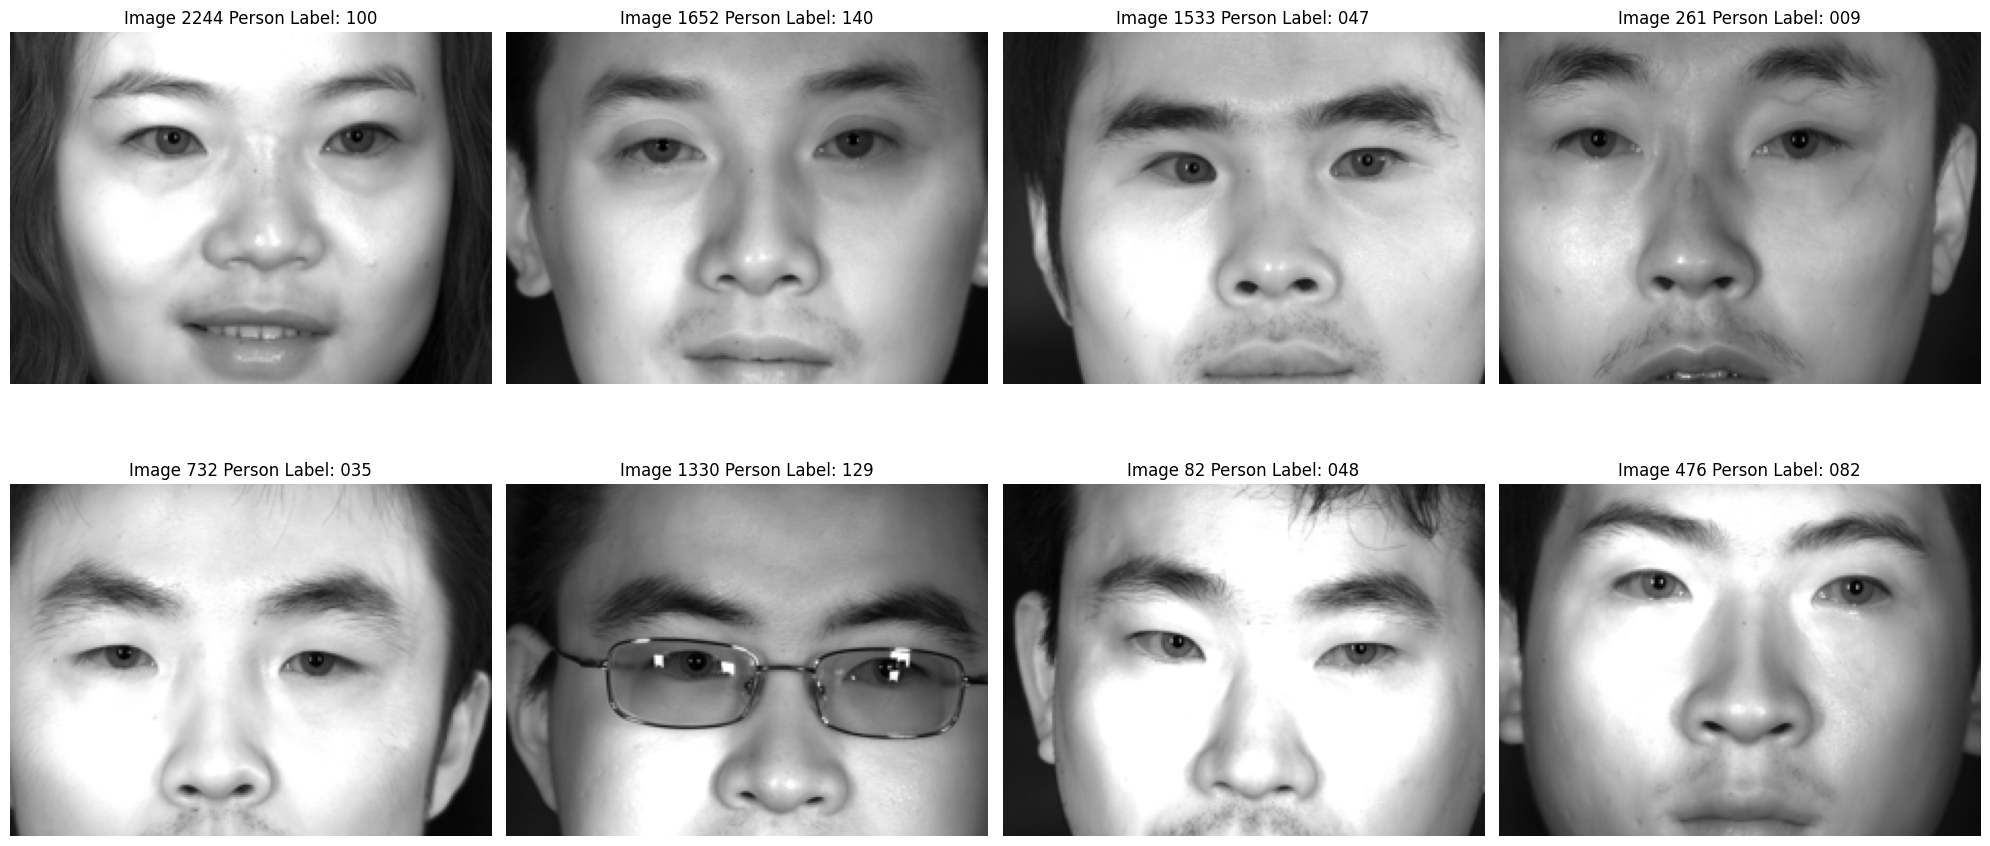

In [12]:
show_random_samples(df, 8)

In [25]:
image_sizes = []
aspect_ratios = []

for image_path in df['ImagePath']:
    image = PIL.Image.open(image_path)
    width, height = image.size
    image_sizes.append(width * height)
    aspect_ratios.append(width / height)

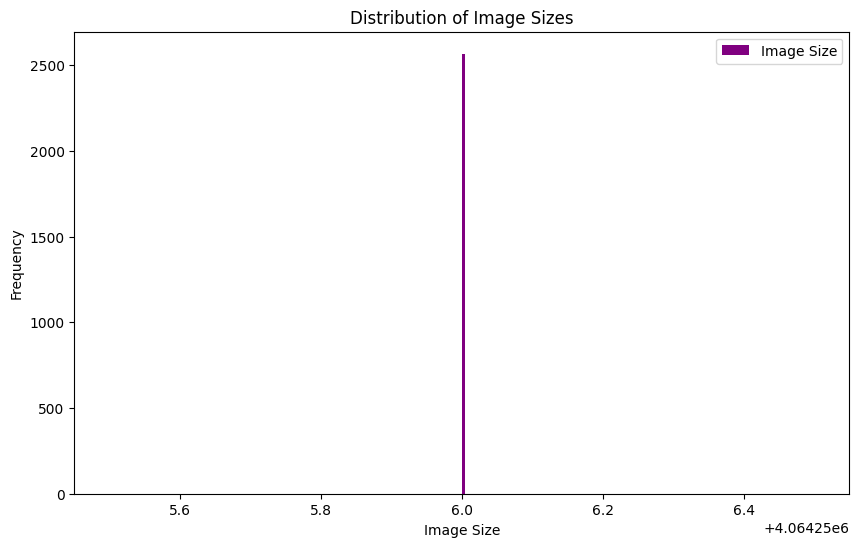

In [17]:
# here I plot a histogram for the images sizes
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(image_sizes, bins=200, label="Image Size", color='Purple')
ax.set_title("Distribution of Image Sizes")
ax.set_xlabel("Image Size")
ax.set_ylabel("Frequency")
ax.legend()

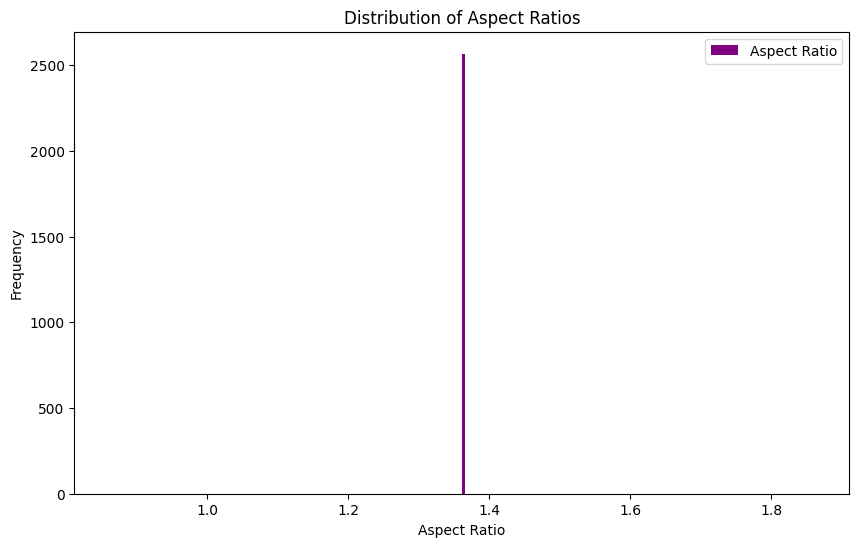

In [18]:
# Here I plot a histogram for the aspect ratios
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=200, label="Aspect Ratio",color='Purple')
plt.title("Distribution of Aspect Ratios")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.legend()

#### Preparing Dataset

##### Images preparing

In [34]:
def preprocess_images(img, target_height=64, target_width=64, pad_value=255):
    aspect_ratio = img.shape[1] / img.shape[0]
    if aspect_ratio > target_width / target_height:
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(target_height * aspect_ratio)

    resized_img = cv2.resize(img, (new_width, new_height))
    preprocessed_img = np.full((target_height, target_width), pad_value, dtype=np.uint8)
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2
    preprocessed_img[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_img
    preprocessed_img = cv2.rotate(preprocessed_img, cv2.ROTATE_90_CLOCKWISE)
    return preprocessed_img

In [36]:
processed_images = []

for i in range(len(images)):
    img_dir = images[i]
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess_images(image)
    image = image/255.
    processed_images.append(image)
processed_images = np.array(processed_images).reshape(-1, 64, 64, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

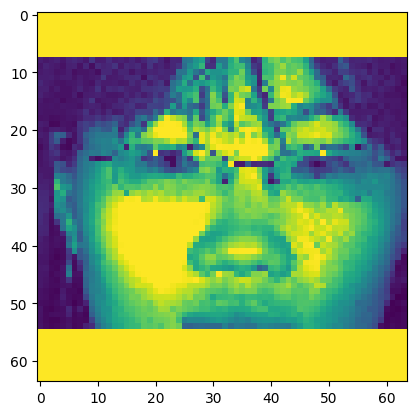

In [37]:
plt.imshow(cv2.rotate(processed_images[5],  cv2.ROTATE_90_COUNTERCLOCKWISE))
plt.show

##### labels preparing:

In [ ]:
def preprocess_labels(df):
    """
    
    """

In [ ]:
def prepare_dataset(df):
    """
    
    """
    images = preprocess_images(df)
    labels = preprocess_labels(df)
    return images, labels

<hr>

### Data modeling (The Verifier)

#### Model Archeticticure:

##### Base model (Feature Extracture)

In [ ]:
activation =''
padding = ''
poolpadding = ''

In [ ]:
def feature_extraction(input_img, input_shape= (800, 64, 1)):
    """
    Args:
        takes the input image size
    
    Returns:
        features of that image
    
    """
    conv1 = Conv2D(64, (5, 5), padding=padding, name="conv1")(input_img)
    act1 = Activation(activation)(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="pool1")(act1)
    x = Dropout(0.1, name="dropout")(pool1)
    
    conv2 = Conv2D(128, (5, 5), padding=padding, name="conv2")(x)
    act2 = Activation(activation)(conv2)
    pool2 = MaxPooling2D(pool_size=(1, 2), padding=poolpadding, name="pool2")(act2)
    x = Dropout(0.2, name="dropout1")(pool2)
    
    conv3 = Conv2D(128, (3, 3), padding=padding, name="conv3")(x)
    act3 = Activation(activation)(conv3)
    batch_norm3 = BatchNormalization(name="BatchNorm1")(act3)
    pool3 = MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="pool3")(batch_norm3)
    x = Dropout(0.25, name="dropout2")(pool3)
    
    conv4 = Conv2D(256, (3, 3), padding=padding, name="conv4")(x)
    act4 = Activation(activation)(conv4)
    x = Dropout(0.3, name="dropout3")(act4)
    
    conv5 = Conv2D(256, (3, 3), padding=padding, name="conv5")(x)
    act5 = Activation(activation)(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="pool4")(act5)
    x = Dropout(0.35, name="dropout4")(pool5)

    conv6 = Conv2D(512, (3, 3), padding=padding, name="conv6")(pool5)
    act6 = Activation(activation)(conv6)
    batch_norm6 = BatchNormalization(name="BatchNorm2")(act6)
    pool6 = MaxPooling2D(pool_size=(1, 2), padding=poolpadding, name="pool5")(batch_norm6)
    x = Dropout(0.4, name="dropout5")(pool6)
    
    conv7 = Conv2D(512, (3, 3), padding=padding, name="conv7")(x)
    act7 = Activation(activation)(conv7)
    pool7 = MaxPooling2D(pool_size=(1, 2), padding=poolpadding, name="pool6")(act7)
    x = Dropout(0.45, name="dropout6")(pool7)
    return x

In [ ]:
def recognition_model(optimizer='sgd',learning_rate=1e-2, input_shape=(64, 800, 1), activation='leaky_relu'):
    """
    Takes two args: 
        (optimizer): to test on diffrent optimizers
        (activation): to test on diffrent activations
    Returns:
        (model) a model compiled with it's layers
    """
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape, name='input_image'))
    model.add(Flatten())
    model.add(Dense(142, activation='softmax', name='output_sentence'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#### Recognition model

In [ ]:
def reconition_model(featurres):
    """
    
    """

#### Model Training and testing:

#### Model Evaluaion metrics:

<hr>

### User Experinece and GUI (The Authenticater)

#### Image Accuisition (for enrollment)

#### Image Accuisition (for authentication)

#### Image Preparing for Recognition

In [ ]:
def input_image_preprocesisng(image):
    """
    
    """

#### Model Inference

<hr>

## Conclusion

## Refrences
- [1] [Deep Learning for Iris Recognition: A Review, Yin, Y., He, S., Zhang, R., Chang, H., Han, X., & Zhang, J. (2024)](https://arxiv.org/abs/2303.08514)